In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [22]:
df = pd.read_csv('Social_Network_Ads.csv')

In [23]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [24]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [25]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [26]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x = df[[
    ,'EstimatedSalary']]
print(x.head)
y = df['Purchased']
print(y.head)

<bound method NDFrame.head of      Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]>
<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64>


In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [31]:
predictions = model.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

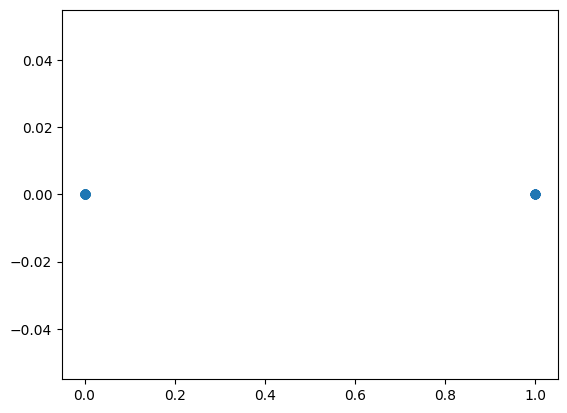

In [40]:
plt.scatter(y_test,predictions)

In [32]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test,predictions))


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

confusion_matrix(y_test,predictions)

# true_negative   false_positive
# false_negative  true_positive

array([[58,  0],
       [22,  0]], dtype=int64)

In [34]:
accuracy_score(y_test,predictions)

0.725

In [35]:
print(f'error rate : {1 - accuracy_score(y_test,predictions)}')

error rate : 0.275


In [36]:
print(f'precision score = TP/(TP + FP):')

precision score = TP/(TP + FP):


In [37]:
precision_score(y_test,predictions,zero_division=0)

0.0

In [38]:
recall_score(y_test,predictions)

0.0

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        58
           1       0.00      0.00      0.00        22

    accuracy                           0.73        80
   macro avg       0.36      0.50      0.42        80
weighted avg       0.53      0.72      0.61        80

